In [1]:
import os
import sys
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt


from pylab import rcParams
# import matplotlib.animation as animation
# from matplotlib import rc

# configuration for graphics and random seed

%matplotlib inline

# sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 7, 7

In [2]:
NOTEBOOK_DIR = os.path.dirname(os.path.realpath("__file__"))
PROJECT_ROOT = os.path.dirname(NOTEBOOK_DIR)

sys.path.append(PROJECT_ROOT) # make my_module available to import

# Importing my python module utils
from emotion_detection_system.processing_results.information_from_results import *

In [3]:
def does_it_pass_t_test(values_1, values_2,tolerance=0.05):
    _, pvalue = stats.ttest_ind(values_1, values_2)
    if pvalue <= tolerance:
        return True
    else:
        return False

In [4]:
BASELINE_DATA['data_experiment_config'] = 'SVM_BL'
oversampling_data_results['data_experiment_config'] = 'SVM_OS'
svm_undersampling_data_results['data_experiment_config'] = 'SVM_US'
nn_bl_data_results['data_experiment_config'] = 'NN_BL'
nn_oversampling_data_results['data_experiment_config'] = 'NN_OS'
nn_undersampling_data_results['data_experiment_config'] = 'NN_US'
current_data = pd.concat([BASELINE_DATA, svm_undersampling_data_results, oversampling_data_results, 
                          nn_bl_data_results, nn_undersampling_data_results, nn_oversampling_data_results])
current_data

,Data_Included_Slug,Participant,Session,Scenario,Annotation_Type,Accuracy,Accuracy_Balanced,Precision_Blue,Precision_Green,Precision_Red,Precision_Yellow,Recall_Blue,Recall_Green,Recall_Red,Recall_Yellow,F1score_Blue,F1score_Green,F1score_Red,F1score_Yellow,data_experiment_config
0,session_03_02_va_early_fusion,NaN,Session_03_02,va_early_fusion,parents,0.7030,0.5978,0.6902,0.7288,0.5000,0.6630,0.5799,0.8607,0.3750,0.5755,0.6303,0.7893,0.4286,0.6162,SVM_BL
1,participant_01_va_late_fusion,Participant_01,NaN,va_late_fusion,parents,0.7134,0.4562,0.7115,0.7126,0.6250,0.8000,0.5714,0.9225,0.1282,0.2025,0.6338,0.8041,0.2128,0.3232,SVM_BL
2,all_data_va_late_fusion,All data,NaN,va_late_fusion,parents,0.6508,0.4432,0.7255,0.6368,0.6512,0.7000,0.4018,0.9559,0.2658,0.1491,0.5172,0.7644,0.3775,0.2458,SVM_BL
3,participant_02_va_late_fusion,Participant_02,NaN,va_late_fusion,parents,0.6478,0.5171,0.7423,0.6421,0.5816,0.6168,0.4768,0.9347,0.3851,0.2718,0.5806,0.7613,0.4634,0.3773,SVM_BL
4,session_01_01_a,NaN,Session_01_01,a,parents,0.5543,0.2790,0.4041,0.5926,0.0000,0.0000,0.2476,0.8682,0.0000,0.0000,0.3071,0.7044,0.0000,0.0000,SVM_BL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,session_02_02_va_early_fusion,NaN,Session_02_02,va_early_fusion,specialist,0.8331,0.7254,0.7532,0.8885,0.7500,0.6265,0.7580,0.8853,0.6000,0.6582,0.7556,0.8869,0.6667,0.6420,NN_OS
92,all_data_va_late_fusion,All data,NaN,va_late_fusion,specialist,0.8070,0.7273,0.7279,0.8867,0.3989,0.6923,0.7642,0.8625,0.6098,0.6725,0.7456,0.8745,0.4823,0.6823,NN_OS
93,session_04_01_va_early_fusion,NaN,Session_04_01,va_early_fusion,specialist,0.8932,0.8183,0.7536,0.9551,0.8387,0.8101,0.8387,0.9374,0.6341,0.8631,0.7939,0.9461,0.7222,0.8357,NN_OS
94,session_01_01_a,NaN,Session_01_01,a,specialist,0.5654,0.5141,0.5082,0.7786,0.1250,0.4786,0.6703,0.6205,0.4186,0.3472,0.5781,0.6906,0.1925,0.4024,NN_OS


# Step 1 Plots

Text(0, 0.5, 'Accuracy')

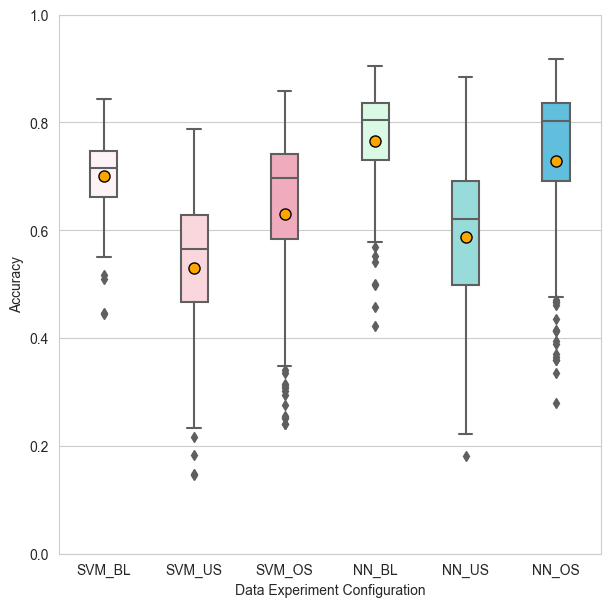

In [5]:
my_palette = {'SVM_BL': '#FFF0F5', 'SVM_US': '#FFD1DA', 'SVM_OS': '#FBA1B7',
             'NN_OS': '#4CC9F0', 'NN_US': '#8BE8E5', 'NN_BL': '#D5FFE4' }
sns.set_style("whitegrid")
ax = sns.boxplot(data=current_data, x="data_experiment_config", y="Accuracy",
                 width=0.3, palette=my_palette, showmeans=True, 
                 meanprops={'marker':'o',
                       'markerfacecolor':'orange', 
                       'markeredgecolor':'black',
                       'markersize':'8'})
ax.set(ylim=(0,1))
ax.set_xlabel('Data Experiment Configuration')
ax.set_ylabel('Accuracy')


Text(0, 0.5, 'Balanced Accuracy')

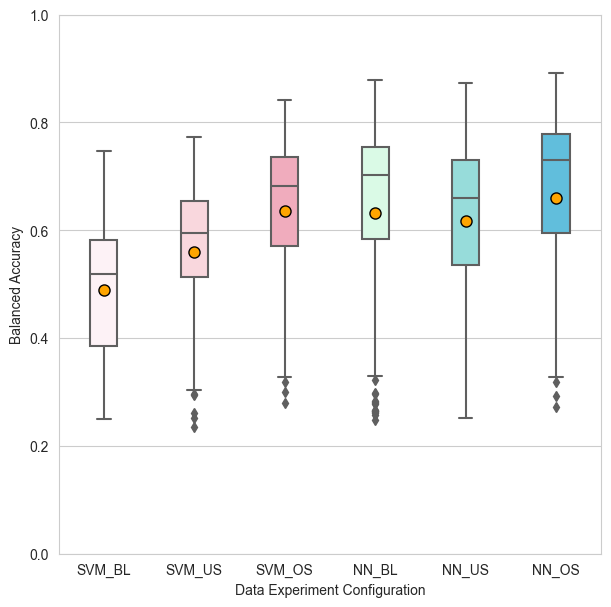

In [6]:
my_palette = {'SVM_BL': '#FFF0F5', 'SVM_US': '#FFD1DA', 'SVM_OS': '#FBA1B7',
             'NN_OS': '#4CC9F0', 'NN_US': '#8BE8E5', 'NN_BL': '#D5FFE4' }
ax = sns.boxplot(data=current_data, x="data_experiment_config", y="Accuracy_Balanced", 
                 width=0.3, palette=my_palette,  showmeans=True, 
                 meanprops={'marker':'o',
                       'markerfacecolor':'orange', 
                       'markeredgecolor':'black',
                       'markersize':'8'})
ax.set(ylim=(0,1))
ax.set_xlabel('Data Experiment Configuration')
ax.set_ylabel('Balanced Accuracy')

Text(0, 0.5, 'F1score Blue')

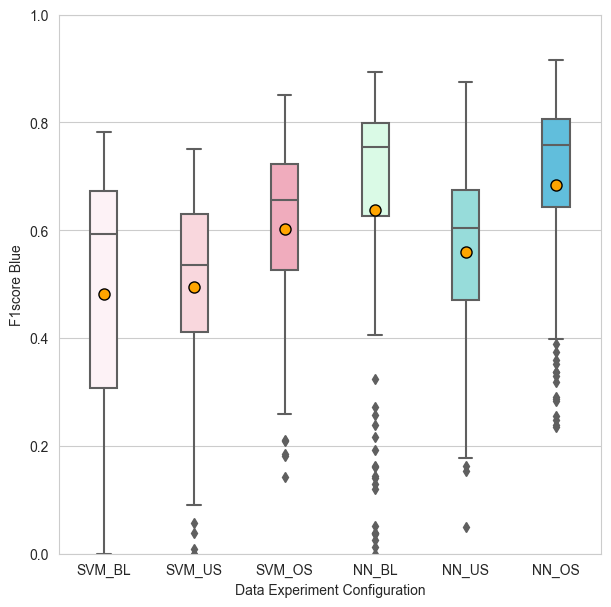

In [7]:
my_palette = {'SVM_BL': '#FFF0F5', 'SVM_US': '#FFD1DA', 'SVM_OS': '#FBA1B7',
             'NN_OS': '#4CC9F0', 'NN_US': '#8BE8E5', 'NN_BL': '#D5FFE4' }
sns.set_style("whitegrid")
ax = sns.boxplot(data=current_data, x="data_experiment_config", y="F1score_Blue",
                 width=0.3, palette=my_palette, showmeans=True, 
                 meanprops={'marker':'o',
                       'markerfacecolor':'orange', 
                       'markeredgecolor':'black',
                       'markersize':'8'})
ax.set(ylim=(0,1))
ax.set_xlabel('Data Experiment Configuration')
ax.set_ylabel('F1score Blue')

Text(0, 0.5, 'F1score Green')

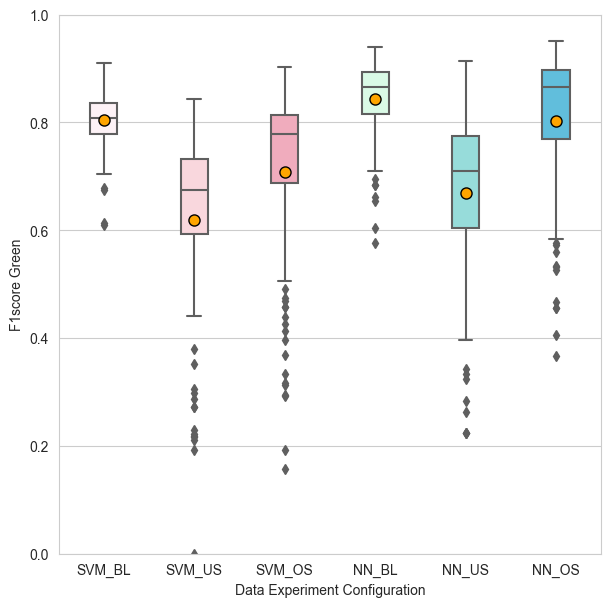

In [7]:
my_palette = {'SVM_BL': '#FFF0F5', 'SVM_US': '#FFD1DA', 'SVM_OS': '#FBA1B7',
             'NN_OS': '#4CC9F0', 'NN_US': '#8BE8E5', 'NN_BL': '#D5FFE4' }
sns.set_style("whitegrid")
ax = sns.boxplot(data=current_data, x="data_experiment_config", y="F1score_Green",
                 width=0.3, palette=my_palette, showmeans=True, 
                 meanprops={'marker':'o',
                       'markerfacecolor':'orange', 
                       'markeredgecolor':'black',
                       'markersize':'8'})
ax.set(ylim=(0,1))
ax.set_xlabel('Data Experiment Configuration')
ax.set_ylabel('F1score Green')

Text(0, 0.5, 'F1score Yellow')

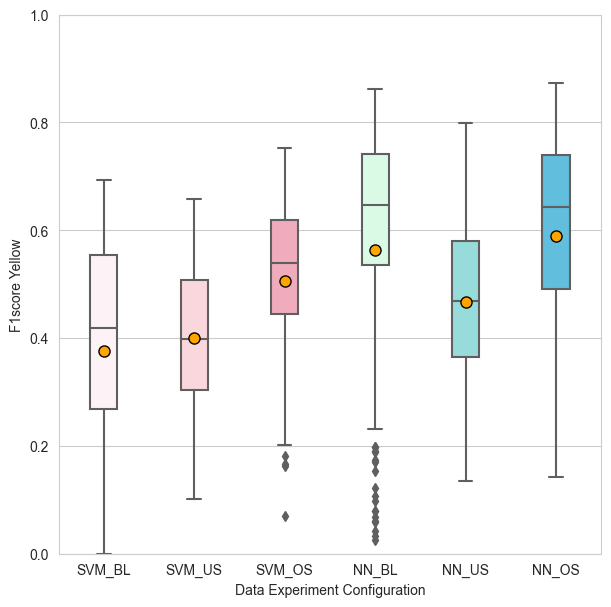

In [8]:
my_palette = {'SVM_BL': '#FFF0F5', 'SVM_US': '#FFD1DA', 'SVM_OS': '#FBA1B7',
             'NN_OS': '#4CC9F0', 'NN_US': '#8BE8E5', 'NN_BL': '#D5FFE4' }
sns.set_style("whitegrid")
ax = sns.boxplot(data=current_data, x="data_experiment_config", y="F1score_Yellow",
                 width=0.3, palette=my_palette, showmeans=True, 
                 meanprops={'marker':'o',
                       'markerfacecolor':'orange', 
                       'markeredgecolor':'black',
                       'markersize':'8'})
ax.set(ylim=(0,1))
ax.set_xlabel('Data Experiment Configuration')
ax.set_ylabel('F1score Yellow')

Text(0, 0.5, 'F1score Red')

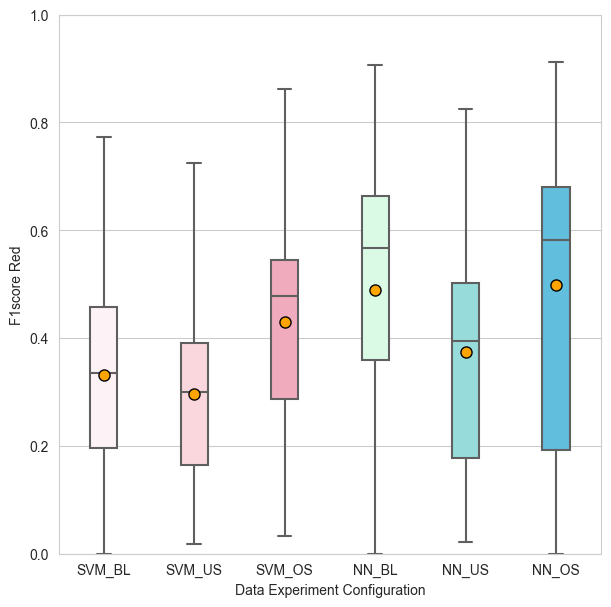

In [9]:
my_palette = {'SVM_BL': '#FFF0F5', 'SVM_US': '#FFD1DA', 'SVM_OS': '#FBA1B7',
             'NN_OS': '#4CC9F0', 'NN_US': '#8BE8E5', 'NN_BL': '#D5FFE4' }
sns.set_style("whitegrid")
ax = sns.boxplot(data=current_data, x="data_experiment_config", y="F1score_Red",
                 width=0.3, palette=my_palette, showmeans=True, 
                 meanprops={'marker':'o',
                       'markerfacecolor':'orange', 
                       'markeredgecolor':'black',
                       'markersize':'8'})
ax.set(ylim=(0,1))
ax.set_xlabel('Data Experiment Configuration')
ax.set_ylabel('F1score Red')

In [11]:
nn_bl_data_results['model_group'] = nn_bl_data_results.apply(lambda row: get_model_group(row), axis=1)
nn_oversampling_data_results['model_group'] = nn_oversampling_data_results.apply(lambda row: get_model_group(row), 
                                                                                 axis=1)
nn_bl_data_results

,Data_Included_Slug,Participant,Session,Scenario,Annotation_Type,Accuracy,Accuracy_Balanced,Precision_Blue,Precision_Green,Precision_Red,...,Recall_Blue,Recall_Green,Recall_Red,Recall_Yellow,F1score_Blue,F1score_Green,F1score_Red,F1score_Yellow,data_experiment_config,model_group
0,all_data_va_early_fusion,All data,NaN,va_early_fusion,parents,0.7503,0.6557,0.7384,0.8066,0.6220,...,0.6921,0.8568,0.50000,0.57400,0.7145,0.8310,0.55440,0.58840,NN_BL,GM
1,session_01_01_va_early_fusion,NaN,Session_01_01,va_early_fusion,parents,0.7777,0.6305,0.7690,0.8142,0.5600,...,0.7397,0.8663,0.35900,0.55700,0.7540,0.8394,0.43750,0.58280,NN_BL,SSM
2,participant_04_va_late_fusion,Participant_04,NaN,va_late_fusion,parents,0.8010,0.6335,0.7937,0.8164,0.6957,...,0.6098,0.9426,0.45070,0.53110,0.6897,0.8750,0.54700,0.61670,NN_BL,PSM
3,session_03_02_a,NaN,Session_03_02,a,parents,0.4574,0.2817,0.3800,0.4692,0.0000,...,0.1735,0.8496,0.00000,0.10380,0.2382,0.6046,0.00000,0.16920,NN_BL,SSM
4,session_04_01_v,NaN,Session_04_01,v,parents,0.8409,0.7285,0.7658,0.8967,0.5312,...,0.8231,0.9087,0.60710,0.57500,0.7934,0.9027,0.56670,0.66190,NN_BL,SSM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,all_data_a,All data,NaN,a,specialist,0.6054,0.2964,0.3828,0.6428,0.1154,...,0.1288,0.9030,0.02439,0.12950,0.1928,0.7510,0.04027,0.18880,NN_BL,GM
92,session_03_01_v,NaN,Session_03_01,v,specialist,0.9033,0.8793,0.9450,0.9231,NaN,...,0.8475,0.9407,NaN,0.84960,0.8936,0.9318,NaN,0.81000,NN_BL,SSM
93,session_04_02_a,NaN,Session_04_02,a,specialist,0.5681,0.2784,0.4699,0.5889,0.0000,...,0.1773,0.9027,0.00000,0.03371,0.2574,0.7128,0.00000,0.05882,NN_BL,SSM
94,participant_04_va_early_fusion,Participant_04,NaN,va_early_fusion,specialist,0.8172,0.7041,0.7432,0.8663,0.6970,...,0.6773,0.9013,0.47920,0.75880,0.7087,0.8834,0.56790,0.75000,NN_BL,PSM


# Step 2 Plots

In [12]:
step_2_data = pd.concat([nn_bl_data_results, nn_oversampling_data_results])
step_2_data

,Data_Included_Slug,Participant,Session,Scenario,Annotation_Type,Accuracy,Accuracy_Balanced,Precision_Blue,Precision_Green,Precision_Red,...,Recall_Blue,Recall_Green,Recall_Red,Recall_Yellow,F1score_Blue,F1score_Green,F1score_Red,F1score_Yellow,data_experiment_config,model_group
0,all_data_va_early_fusion,All data,NaN,va_early_fusion,parents,0.7503,0.6557,0.7384,0.8066,0.6220,...,0.6921,0.8568,0.5000,0.5740,0.7145,0.8310,0.5544,0.5884,NN_BL,GM
1,session_01_01_va_early_fusion,NaN,Session_01_01,va_early_fusion,parents,0.7777,0.6305,0.7690,0.8142,0.5600,...,0.7397,0.8663,0.3590,0.5570,0.7540,0.8394,0.4375,0.5828,NN_BL,SSM
2,participant_04_va_late_fusion,Participant_04,NaN,va_late_fusion,parents,0.8010,0.6335,0.7937,0.8164,0.6957,...,0.6098,0.9426,0.4507,0.5311,0.6897,0.8750,0.5470,0.6167,NN_BL,PSM
3,session_03_02_a,NaN,Session_03_02,a,parents,0.4574,0.2817,0.3800,0.4692,0.0000,...,0.1735,0.8496,0.0000,0.1038,0.2382,0.6046,0.0000,0.1692,NN_BL,SSM
4,session_04_01_v,NaN,Session_04_01,v,parents,0.8409,0.7285,0.7658,0.8967,0.5312,...,0.8231,0.9087,0.6071,0.5750,0.7934,0.9027,0.5667,0.6619,NN_BL,SSM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,session_02_02_va_early_fusion,NaN,Session_02_02,va_early_fusion,specialist,0.8331,0.7254,0.7532,0.8885,0.7500,...,0.7580,0.8853,0.6000,0.6582,0.7556,0.8869,0.6667,0.6420,NN_OS,SSM
92,all_data_va_late_fusion,All data,NaN,va_late_fusion,specialist,0.8070,0.7273,0.7279,0.8867,0.3989,...,0.7642,0.8625,0.6098,0.6725,0.7456,0.8745,0.4823,0.6823,NN_OS,GM
93,session_04_01_va_early_fusion,NaN,Session_04_01,va_early_fusion,specialist,0.8932,0.8183,0.7536,0.9551,0.8387,...,0.8387,0.9374,0.6341,0.8631,0.7939,0.9461,0.7222,0.8357,NN_OS,SSM
94,session_01_01_a,NaN,Session_01_01,a,specialist,0.5654,0.5141,0.5082,0.7786,0.1250,...,0.6703,0.6205,0.4186,0.3472,0.5781,0.6906,0.1925,0.4024,NN_OS,SSM


Text(0, 0.5, 'Accuracy')

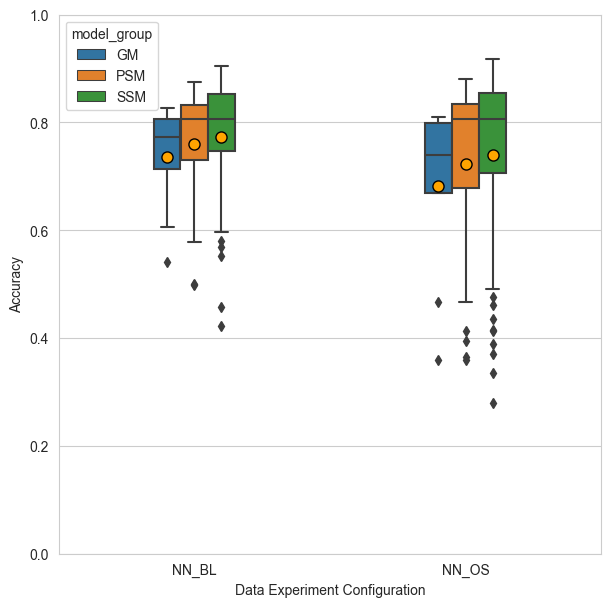

In [13]:
my_palette = {'SVM_BL': '#FFF0F5', 'SVM_US': '#FFD1DA', 'SVM_OS': '#FBA1B7',
             'NN_OS': '#4CC9F0', 'NN_US': '#8BE8E5', 'NN_BL': '#D5FFE4' }
hue_order = ['GM', 'PSM', 'SSM']
sns.set_style("whitegrid")
ax = sns.boxplot(data=step_2_data, x="data_experiment_config", y="Accuracy", 
                 hue='model_group', hue_order = hue_order,
                 width=0.3, showmeans=True, 
                 meanprops={'marker':'o',
                       'markerfacecolor':'orange', 
                       'markeredgecolor':'black',
                       'markersize':'8'})
ax.set(ylim=(0,1))
ax.set_xlabel('Data Experiment Configuration')
ax.set_ylabel('Accuracy')

Text(0, 0.5, 'Balanced Accuracy')

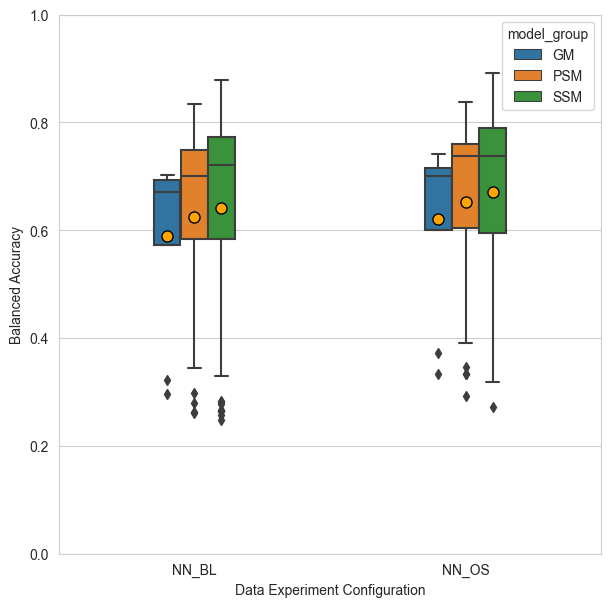

In [14]:
my_palette = {'SVM_BL': '#FFF0F5', 'SVM_US': '#FFD1DA', 'SVM_OS': '#FBA1B7',
             'NN_OS': '#4CC9F0', 'NN_US': '#8BE8E5', 'NN_BL': '#D5FFE4' }
hue_order = ['GM', 'PSM', 'SSM']
sns.set_style("whitegrid")
ax = sns.boxplot(data=step_2_data, x="data_experiment_config", y="Accuracy_Balanced", 
                 hue='model_group', hue_order=hue_order,
                 width=0.3, showmeans=True, 
                 meanprops={'marker':'o',
                       'markerfacecolor':'orange', 
                       'markeredgecolor':'black',
                       'markersize':'8'})
ax.set(ylim=(0,1))
ax.set_xlabel('Data Experiment Configuration')
ax.set_ylabel('Balanced Accuracy')

Text(0, 0.5, 'F1Scores Blue')

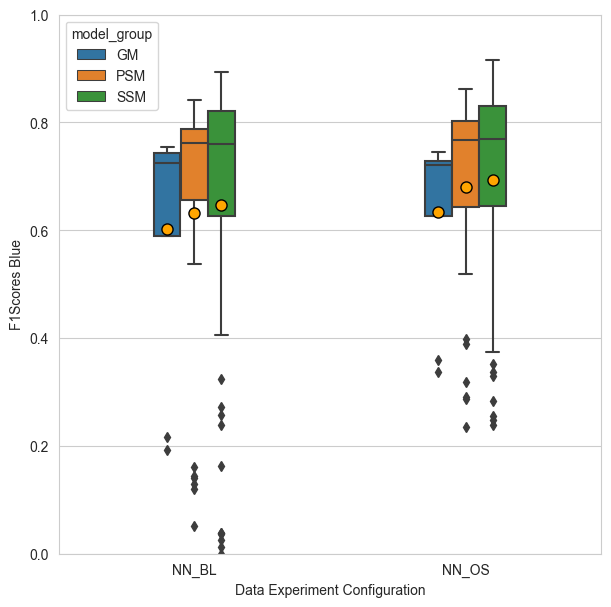

In [16]:
hue_order = ['GM', 'PSM', 'SSM']
sns.set_style("whitegrid")
ax = sns.boxplot(data=step_2_data, x="data_experiment_config", y="F1score_Blue", 
                 hue='model_group', hue_order=hue_order,
                 width=0.3, showmeans=True, 
                 meanprops={'marker':'o',
                       'markerfacecolor':'orange', 
                       'markeredgecolor':'black',
                       'markersize':'8'})
ax.set(ylim=(0,1))
ax.set_xlabel('Data Experiment Configuration')
ax.set_ylabel('F1Scores Blue')

Text(0, 0.5, 'F1Scores Green')

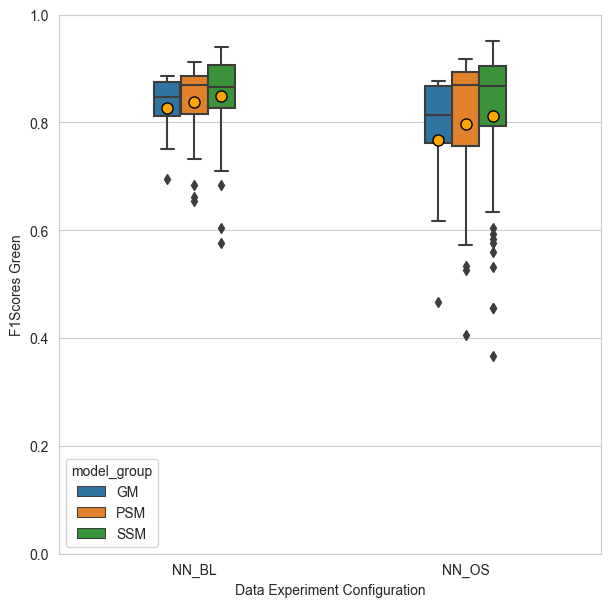

In [17]:
hue_order = ['GM', 'PSM', 'SSM']
sns.set_style("whitegrid")
ax = sns.boxplot(data=step_2_data, x="data_experiment_config", y="F1score_Green", 
                 hue='model_group', hue_order=hue_order,
                 width=0.3, showmeans=True, 
                 meanprops={'marker':'o',
                       'markerfacecolor':'orange', 
                       'markeredgecolor':'black',
                       'markersize':'8'})
ax.set(ylim=(0,1))
ax.set_xlabel('Data Experiment Configuration')
ax.set_ylabel('F1Scores Green')

Text(0, 0.5, 'F1Scores Yellow')

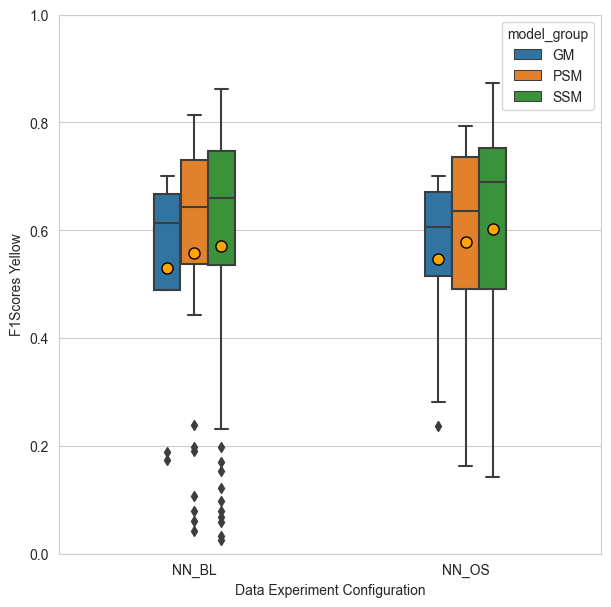

In [18]:
hue_order = ['GM', 'PSM', 'SSM']
sns.set_style("whitegrid")
ax = sns.boxplot(data=step_2_data, x="data_experiment_config", y="F1score_Yellow", 
                 hue='model_group', hue_order=hue_order,
                 width=0.3, showmeans=True, 
                 meanprops={'marker':'o',
                       'markerfacecolor':'orange', 
                       'markeredgecolor':'black',
                       'markersize':'8'})
ax.set(ylim=(0,1))
ax.set_xlabel('Data Experiment Configuration')
ax.set_ylabel('F1Scores Yellow')

Text(0, 0.5, 'F1Scores Red')

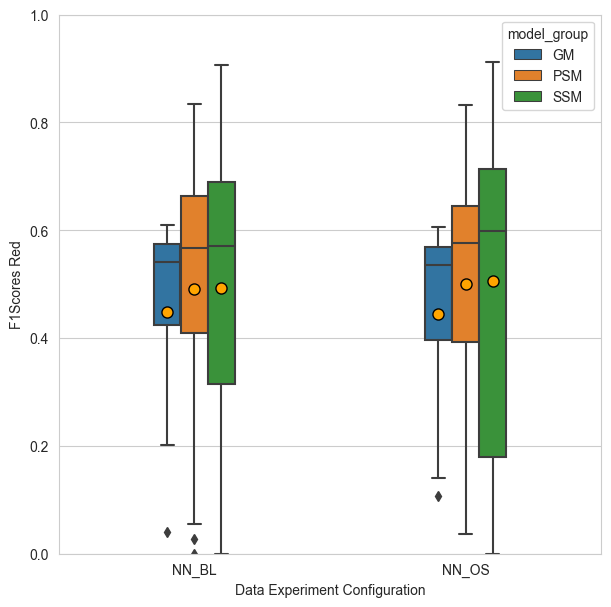

In [19]:
hue_order = ['GM', 'PSM', 'SSM']
sns.set_style("whitegrid")
ax = sns.boxplot(data=step_2_data, x="data_experiment_config", y="F1score_Red", 
                 hue='model_group', hue_order=hue_order,
                 width=0.3, showmeans=True, 
                 meanprops={'marker':'o',
                       'markerfacecolor':'orange', 
                       'markeredgecolor':'black',
                       'markersize':'8'})
ax.set(ylim=(0,1))
ax.set_xlabel('Data Experiment Configuration')
ax.set_ylabel('F1Scores Red')

# Oversampling Random vs. Oversampling Adasyn (NN)

In [7]:
nn_oversampling_adasyn['data_experiment_config'] = 'NN_OS_Adasyn'
nn_oversampling_data_results['model_group'] = nn_oversampling_data_results.apply(lambda row: get_model_group(row), axis=1)
nn_oversampling_adasyn['model_group'] = nn_oversampling_adasyn.apply(lambda row: get_model_group(row), axis=1)

oversamplings = pd.concat([nn_oversampling_adasyn, nn_oversampling_data_results])
oversamplings

,Data_Included_Slug,Participant,Session,Scenario,Annotation_Type,Accuracy,Accuracy_Balanced,Precision_Blue,Precision_Green,Precision_Red,...,Recall_Blue,Recall_Green,Recall_Red,Recall_Yellow,F1score_Blue,F1score_Green,F1score_Red,F1score_Yellow,model_group,data_experiment_config
0,session_03_01_va_late_fusion,NaN,Session_03_01,va_late_fusion,parents,0.8702,0.8288,0.7923,0.9370,0.8269,...,0.9075,0.9028,0.8600,0.6449,0.8460,0.9196,0.8431,0.7005,SSM,NN_OS_Adasyn
1,session_04_02_va_late_fusion,NaN,Session_04_02,va_late_fusion,parents,0.7898,0.6970,0.7083,0.8487,0.5745,...,0.6869,0.8840,0.6279,0.5891,0.6974,0.8660,0.6000,0.6387,SSM,NN_OS_Adasyn
2,session_04_01_va_late_fusion,NaN,Session_04_01,va_late_fusion,parents,0.8253,0.6635,0.7786,0.8622,0.5500,...,0.7415,0.9198,0.3929,0.6000,0.7596,0.8901,0.4583,0.6621,SSM,NN_OS_Adasyn
3,participant_02_va_early_fusion,Participant_02,NaN,va_early_fusion,parents,0.7142,0.7044,0.6630,0.8414,0.5689,...,0.8013,0.7254,0.6419,0.6491,0.7256,0.7791,0.6032,0.6244,PSM,NN_OS_Adasyn
4,session_02_02_a,NaN,Session_02_02,a,parents,0.5395,0.4969,0.4247,0.6932,0.4375,...,0.4847,0.6421,0.6462,0.2148,0.4527,0.6667,0.5217,0.2329,SSM,NN_OS_Adasyn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,session_02_02_va_early_fusion,NaN,Session_02_02,va_early_fusion,specialist,0.8331,0.7254,0.7532,0.8885,0.7500,...,0.7580,0.8853,0.6000,0.6582,0.7556,0.8869,0.6667,0.6420,SSM,NN_OS
92,all_data_va_late_fusion,All data,NaN,va_late_fusion,specialist,0.8070,0.7273,0.7279,0.8867,0.3989,...,0.7642,0.8625,0.6098,0.6725,0.7456,0.8745,0.4823,0.6823,GM,NN_OS
93,session_04_01_va_early_fusion,NaN,Session_04_01,va_early_fusion,specialist,0.8932,0.8183,0.7536,0.9551,0.8387,...,0.8387,0.9374,0.6341,0.8631,0.7939,0.9461,0.7222,0.8357,SSM,NN_OS
94,session_01_01_a,NaN,Session_01_01,a,specialist,0.5654,0.5141,0.5082,0.7786,0.1250,...,0.6703,0.6205,0.4186,0.3472,0.5781,0.6906,0.1925,0.4024,SSM,NN_OS


Text(0, 0.5, 'Accuracy')

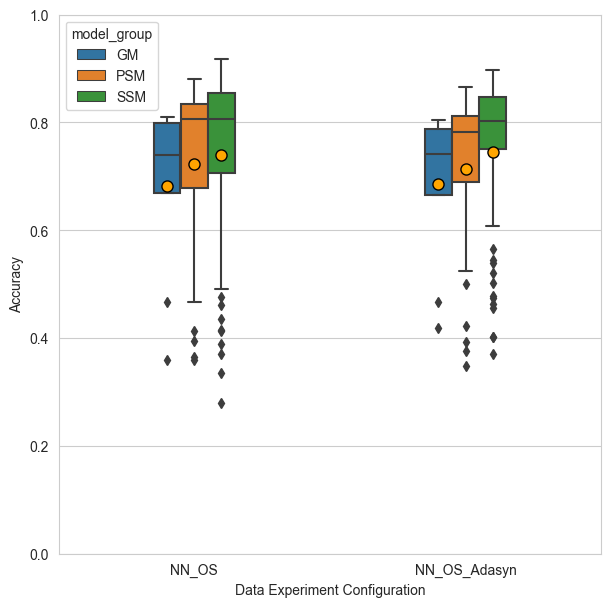

In [11]:
hue_order = ['GM', 'PSM', 'SSM']
order_x = ['NN_OS', 'NN_OS_Adasyn']
sns.set_style("whitegrid")
ax = sns.boxplot(data=oversamplings, x="data_experiment_config", y="Accuracy", 
                 order=order_x,
                 hue='model_group', hue_order=hue_order,
                 width=0.3, showmeans=True, 
                 meanprops={'marker':'o',
                       'markerfacecolor':'orange', 
                       'markeredgecolor':'black',
                       'markersize':'8'})
ax.set(ylim=(0,1))
ax.set_xlabel('Data Experiment Configuration')
ax.set_ylabel('Accuracy')

Text(0, 0.5, 'Balanced Accuracy')

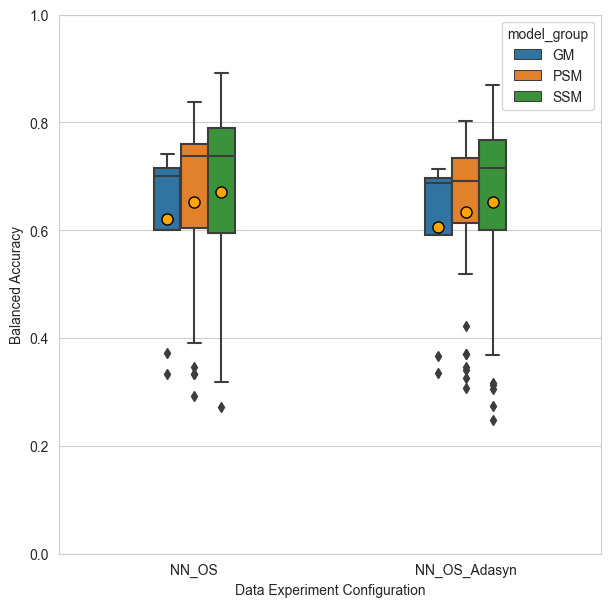

In [13]:
hue_order = ['GM', 'PSM', 'SSM']
order_x = ['NN_OS', 'NN_OS_Adasyn']
sns.set_style("whitegrid")
ax = sns.boxplot(data=oversamplings, x="data_experiment_config", y="Accuracy_Balanced", 
                 order=order_x,
                 hue='model_group', hue_order=hue_order,
                 width=0.3, showmeans=True, 
                 meanprops={'marker':'o',
                       'markerfacecolor':'orange', 
                       'markeredgecolor':'black',
                       'markersize':'8'})
ax.set(ylim=(0,1))
ax.set_xlabel('Data Experiment Configuration')
ax.set_ylabel('Balanced Accuracy')

# Step 3 Analysis - Modalities, Fusion Type and Annotation type

In [7]:

scenario=['va_late_fusion', 'va_early_fusion', 'a', 'v']
annotation_type=['parents', 'specialist']
subset_data='all_data'
resulting_df, _ = get_subset_data(nn_oversampling_data_results, 
                                            scenario=scenario,
                                            annotation_type=annotation_type, 
                                            subdataset_case=subset_data)
# Creating a new column with Modality
new_column = pd.DataFrame(columns=['Modality'])
new_column['Modality'] = resulting_df.apply(lambda row: get_modality(row), axis=1)
resulting_df = pd.concat([resulting_df, new_column], axis=1)

step_3_data_gm = resulting_df

step_3_data_gm

,Data_Included_Slug,Participant,Session,Scenario,Annotation_Type,Accuracy,Accuracy_Balanced,Precision_Blue,Precision_Green,Precision_Red,...,Recall_Blue,Recall_Green,Recall_Red,Recall_Yellow,F1score_Blue,F1score_Green,F1score_Red,F1score_Yellow,data_experiment_config,Modality
5,all_data_a,All data,NaN,a,parents,0.3592,0.3337,0.3021,0.6357,0.09300,...,0.4416,0.3694,0.2808,0.2432,0.3588,0.4672,0.1397,0.2372,NN_OS,a
10,all_data_va_late_fusion,All data,NaN,va_late_fusion,parents,0.7362,0.6964,0.7298,0.8406,0.52710,...,0.7120,0.7859,0.6456,0.6420,0.7208,0.8123,0.5804,0.5933,NN_OS,Multimodal
14,all_data_va_early_fusion,All data,NaN,va_early_fusion,parents,0.7380,0.6764,0.6858,0.8204,0.54760,...,0.7502,0.8021,0.5823,0.5710,0.7165,0.8111,0.5644,0.5933,NN_OS,Multimodal
44,all_data_v,All data,NaN,v,parents,0.7425,0.7117,0.7173,0.8596,0.56440,...,0.7288,0.7736,0.6519,0.6927,0.7230,0.8143,0.6050,0.6178,NN_OS,v
49,all_data_a,All data,NaN,a,specialist,0.4669,0.3713,0.3168,0.7156,0.06881,...,0.3585,0.5426,0.2439,0.3403,0.3363,0.6172,0.1073,0.2804,NN_OS,a
63,all_data_va_early_fusion,All data,NaN,va_early_fusion,specialist,0.7961,0.7037,0.6824,0.8767,0.55830,...,0.7607,0.8523,0.5447,0.6571,0.7194,0.8643,0.5514,0.6682,NN_OS,Multimodal
86,all_data_v,All data,NaN,v,specialist,0.8105,0.7410,0.7063,0.8960,0.43820,...,0.7818,0.8569,0.6341,0.6912,0.7421,0.8760,0.5183,0.7001,NN_OS,v
92,all_data_va_late_fusion,All data,NaN,va_late_fusion,specialist,0.8070,0.7273,0.7279,0.8867,0.39890,...,0.7642,0.8625,0.6098,0.6725,0.7456,0.8745,0.4823,0.6823,NN_OS,Multimodal


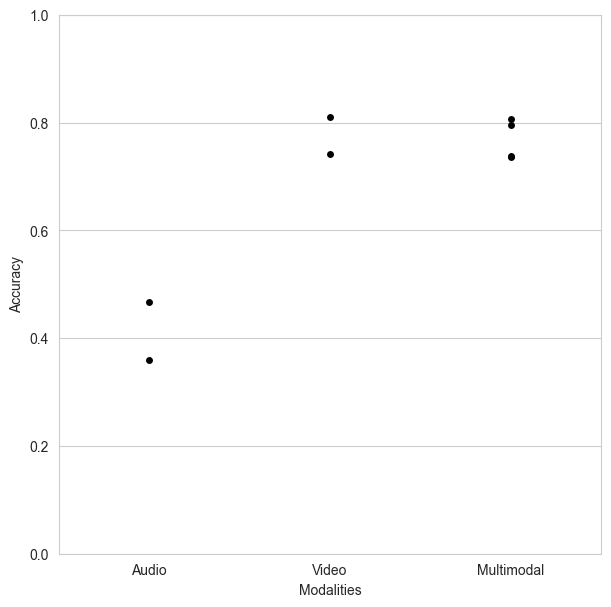

In [21]:
order_x = ['a', 'v', 'Multimodal']
sns.set_style("whitegrid")
ax = sns.stripplot(data=step_3_data_gm, x="Modality", y="Accuracy", 
                    order = order_x,
                    color = 'black', jitter=False)
ax.set(ylim=(0,1))
ax.set_xlabel('Modalities')
ax.set_ylabel('Accuracy')
ax.set_xticks([0, 1, 2], ['Audio', 'Video', 'Multimodal'])

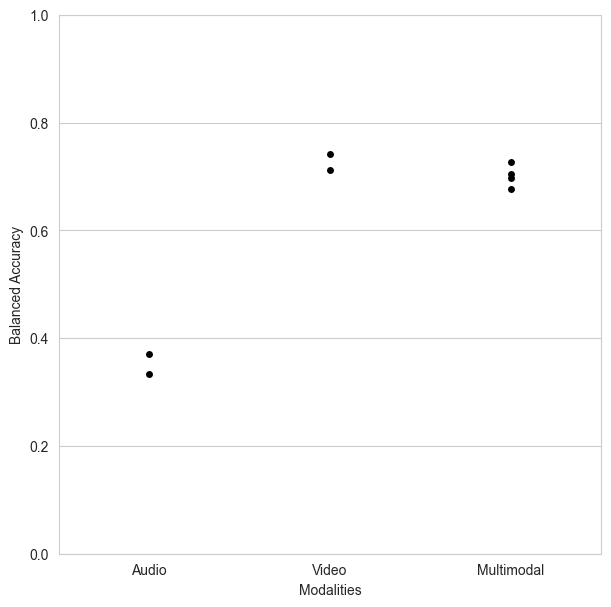

In [20]:
order_x = ['a', 'v', 'Multimodal']
sns.set_style("whitegrid")
ax = sns.stripplot(data=step_3_data_gm, x="Modality", y="Accuracy_Balanced", 
                    order = order_x,
                    color = 'black', jitter=False)
ax.set(ylim=(0,1))
ax.set_xlabel('Modalities')
ax.set_ylabel('Balanced Accuracy')
ax.set_xticks([0, 1, 2], ['Audio', 'Video', 'Multimodal'])

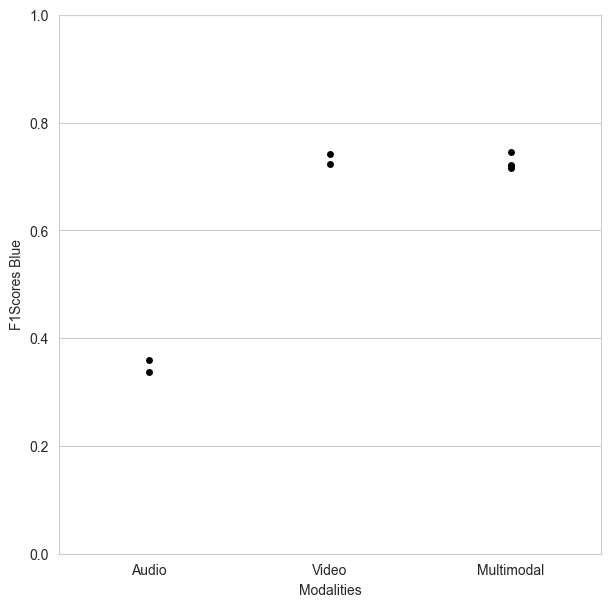

In [19]:
order_x = ['a', 'v', 'Multimodal']
sns.set_style("whitegrid")
ax = sns.stripplot(data=step_3_data_gm, x="Modality", y="F1score_Blue", 
                    order = order_x,
                    color = 'black', jitter=False)
ax.set(ylim=(0,1))
ax.set_xlabel('Modalities')
ax.set_ylabel('F1Scores Blue')
ax.set_xticks([0, 1, 2], ['Audio', 'Video', 'Multimodal'])

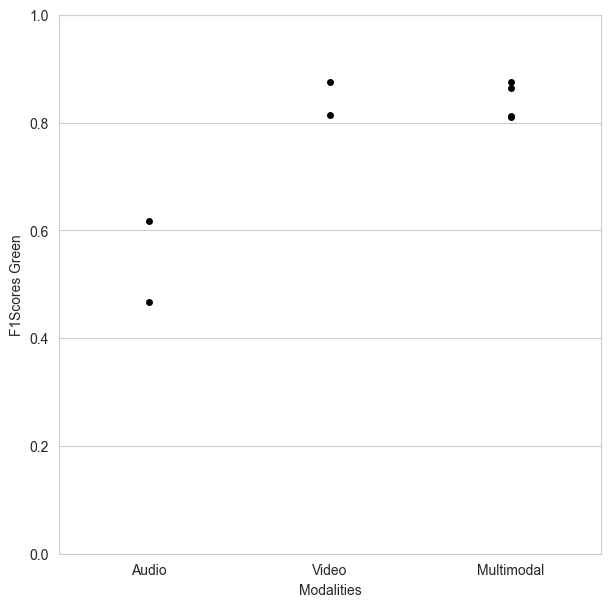

In [18]:
order_x = ['a', 'v', 'Multimodal']
sns.set_style("whitegrid")
ax = sns.stripplot(data=step_3_data_gm, x="Modality", y="F1score_Green", 
                    order = order_x,
                    color = 'black', jitter=False)
ax.set(ylim=(0,1))
ax.set_xlabel('Modalities')
ax.set_ylabel('F1Scores Green')
ax.set_xticks([0, 1, 2], ['Audio', 'Video', 'Multimodal'])


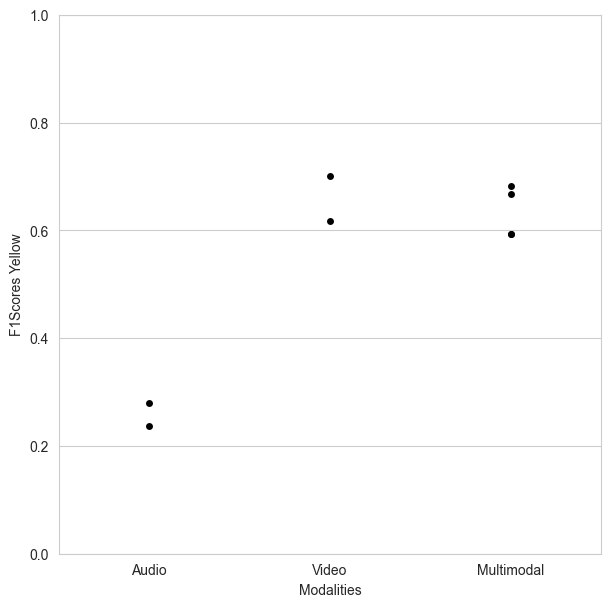

In [17]:
order_x = ['a', 'v', 'Multimodal']
sns.set_style("whitegrid")
ax = sns.stripplot(data=step_3_data_gm, x="Modality", y="F1score_Yellow", 
                    order = order_x,
                    color = 'black', jitter=False)
ax.set(ylim=(0,1))
ax.set_xlabel('Modalities')
ax.set_ylabel('F1Scores Yellow')
ax.set_xticks([0, 1, 2], ['Audio', 'Video', 'Multimodal'])


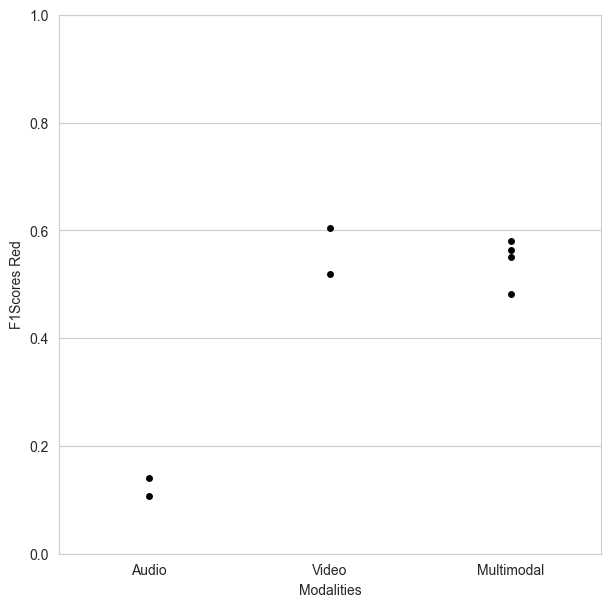

In [16]:
order_x = ['a', 'v', 'Multimodal']
sns.set_style("whitegrid")
ax = sns.stripplot(data=step_3_data_gm, x="Modality", y="F1score_Red", 
                    order = order_x,
                    color = 'black', jitter=False)
ax.set(ylim=(0,1))
ax.set_xlabel('Modalities')
ax.set_ylabel('F1Scores Red')
ax.set_xticks([0, 1, 2], ['Audio', 'Video', 'Multimodal'])


# Plots Step 3 - Fusion Type

In [17]:
scenario=['va_late_fusion', 'va_early_fusion']
annotation_type=['parents', 'specialist']
subset_data='all_data'
resulting_df, _ = get_subset_data(nn_oversampling_data_results, 
                                            scenario=scenario,
                                            annotation_type=annotation_type, 
                                            subdataset_case=subset_data)
# Creating a new column with Modality
# new_column = pd.DataFrame(columns=['Modality'])
# new_column['Modality'] = resulting_df.apply(lambda row: get_modality(row), axis=1)
# resulting_df = pd.concat([resulting_df, new_column], axis=1)

step_3_data_fusion = resulting_df

step_3_data_fusion

,Data_Included_Slug,Participant,Session,Scenario,Annotation_Type,Accuracy,Accuracy_Balanced,Precision_Blue,Precision_Green,Precision_Red,Precision_Yellow,Recall_Blue,Recall_Green,Recall_Red,Recall_Yellow,F1score_Blue,F1score_Green,F1score_Red,F1score_Yellow,data_experiment_config
10,all_data_va_late_fusion,All data,NaN,va_late_fusion,parents,0.7362,0.6964,0.7298,0.8406,0.5271,0.5514,0.7120,0.7859,0.6456,0.6420,0.7208,0.8123,0.5804,0.5933,NN_OS
14,all_data_va_early_fusion,All data,NaN,va_early_fusion,parents,0.7380,0.6764,0.6858,0.8204,0.5476,0.6173,0.7502,0.8021,0.5823,0.5710,0.7165,0.8111,0.5644,0.5933,NN_OS
63,all_data_va_early_fusion,All data,NaN,va_early_fusion,specialist,0.7961,0.7037,0.6824,0.8767,0.5583,0.6795,0.7607,0.8523,0.5447,0.6571,0.7194,0.8643,0.5514,0.6682,NN_OS
92,all_data_va_late_fusion,All data,NaN,va_late_fusion,specialist,0.8070,0.7273,0.7279,0.8867,0.3989,0.6923,0.7642,0.8625,0.6098,0.6725,0.7456,0.8745,0.4823,0.6823,NN_OS


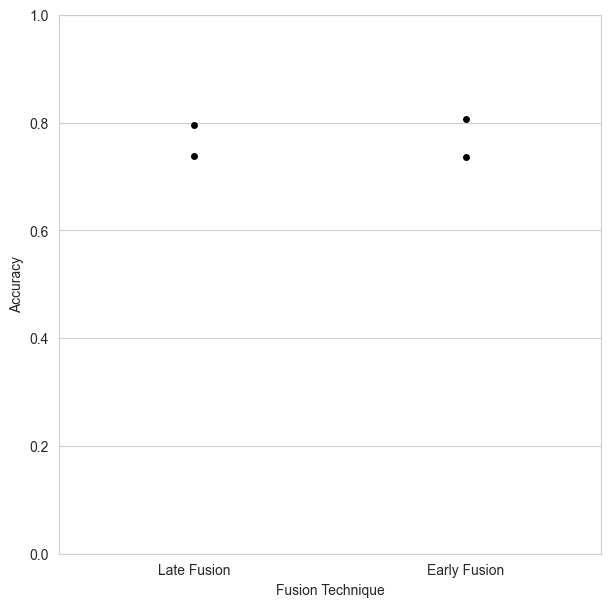

In [18]:
order_x = ['va_early_fusion', 'va_late_fusion']
sns.set_style("whitegrid")
ax = sns.stripplot(data=step_3_data_fusion, x="Scenario", y="Accuracy", 
                   order=order_x,
                    color = 'black', jitter=False)
ax.set(ylim=(0,1))
ax.set_xlabel('Fusion Technique')
ax.set_ylabel('Accuracy')
ax.set_xticks([0, 1], ['Late Fusion', 'Early Fusion'])


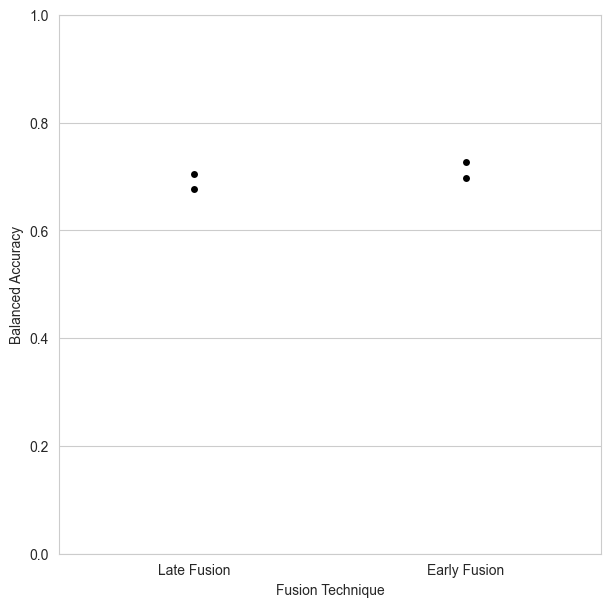

In [11]:
order_x = ['va_early_fusion', 'va_late_fusion']
sns.set_style("whitegrid")
ax = sns.stripplot(data=step_3_data_fusion, x="Scenario", y="Accuracy_Balanced", 
                   order=order_x,
                    color = 'black', jitter=False)
ax.set(ylim=(0,1))
ax.set_xlabel('Fusion Technique')
ax.set_ylabel('Balanced Accuracy')
ax.set_xticks([0, 1], ['Late Fusion', 'Early Fusion'])

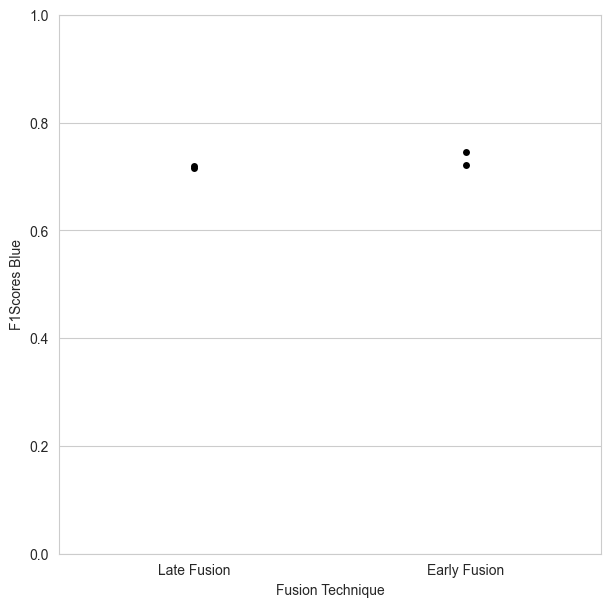

In [15]:
order_x = ['va_early_fusion', 'va_late_fusion']
sns.set_style("whitegrid")
ax = sns.stripplot(data=step_3_data_fusion, x="Scenario", y="F1score_Blue", 
                   order=order_x,
                    color = 'black', jitter=False)
ax.set(ylim=(0,1))
ax.set_xlabel('Fusion Technique')
ax.set_ylabel('F1Scores Blue')
ax.set_xticks([0, 1], ['Late Fusion', 'Early Fusion'])

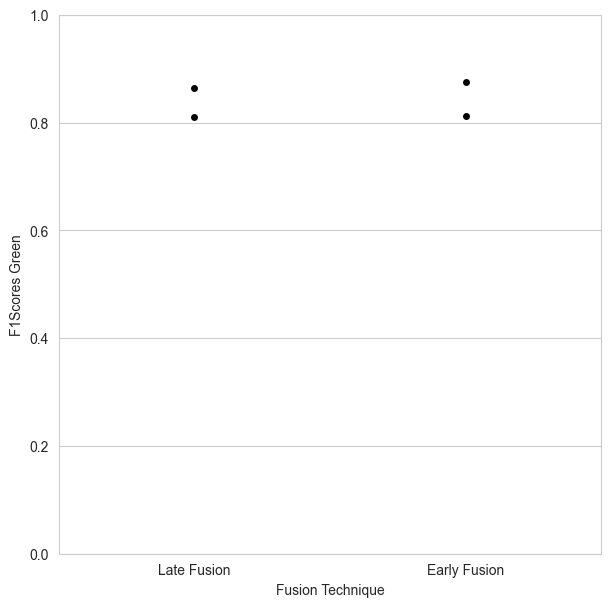

In [14]:
order_x = ['va_early_fusion', 'va_late_fusion']
sns.set_style("whitegrid")
ax = sns.stripplot(data=step_3_data_fusion, x="Scenario", y="F1score_Green", 
                   order=order_x,
                    color = 'black', jitter=False)
ax.set(ylim=(0,1))
ax.set_xlabel('Fusion Technique')
ax.set_ylabel('F1Scores Green')
ax.set_xticks([0, 1], ['Late Fusion', 'Early Fusion'])

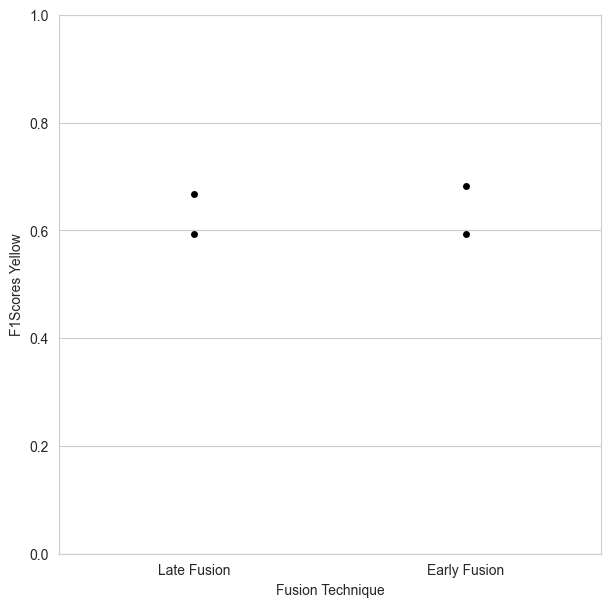

In [13]:
order_x = ['va_early_fusion', 'va_late_fusion']
sns.set_style("whitegrid")
ax = sns.stripplot(data=step_3_data_fusion, x="Scenario", y="F1score_Yellow", 
                   order=order_x,
                    color = 'black', jitter=False)
ax.set(ylim=(0,1))
ax.set_xlabel('Fusion Technique')
ax.set_ylabel('F1Scores Yellow')
ax.set_xticks([0, 1], ['Late Fusion', 'Early Fusion'])

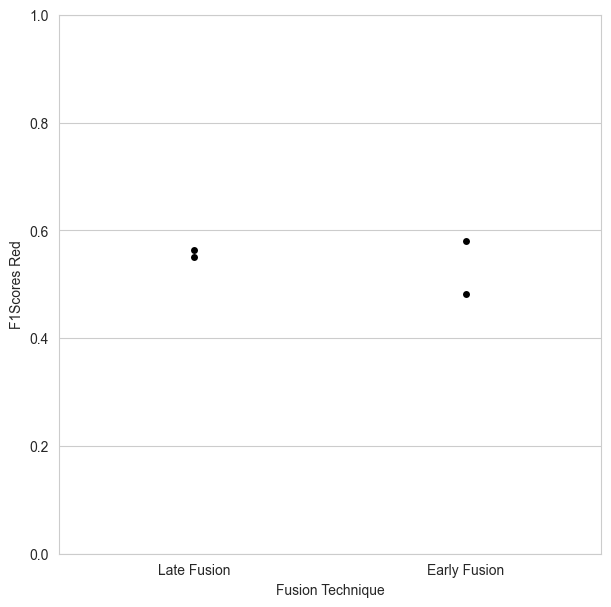

In [12]:
order_x = ['va_early_fusion', 'va_late_fusion']
sns.set_style("whitegrid")
ax = sns.stripplot(data=step_3_data_fusion, x="Scenario", y="F1score_Red", 
                   order=order_x,
                    color = 'black', jitter=False)
ax.set(ylim=(0,1))
ax.set_xlabel('Fusion Technique')
ax.set_ylabel('F1Scores Red')
ax.set_xticks([0, 1], ['Late Fusion', 'Early Fusion'])

# Plots Step 3 - Annotation Type